In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/home/dcoates/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import makeAmoebasX
import amoeba2Dxx
import amoebaSegments2x
import draw_matplotlib
import render

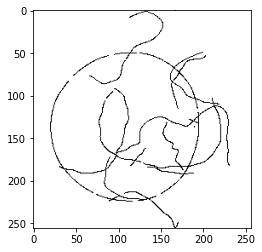

In [3]:
# Defaults are given in amoeba_struct (like in Matlab). Image with target:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'large') 

# A single temporary buf. to reuse for all images
buf = np.zeros((amoeba_struct.image_rect_size, amoeba_struct.image_rect_size), dtype=np.uint8)

# Set these as desired:
which_target=101
which_clutter=100

# Generate and render (255 for segs, 0 for background)
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, which_target, which_clutter )
img=render.render_amoeba(buf, xs,ys)

#Draw (invert for white on black)
plt.imshow(255-img, cmap='bone')

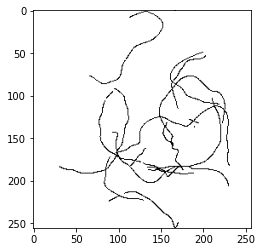

In [4]:
# Non-target image. Has 4 distractors and no target.
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'large') 

which_clutter=100
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, which_clutter )
img=render.render_amoeba(buf, xs,ys)
plt.imshow(255-img, cmap='bone')

In [28]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'small') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)

In [31]:
# Make 100 non-targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'small') 
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, 100000+n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)

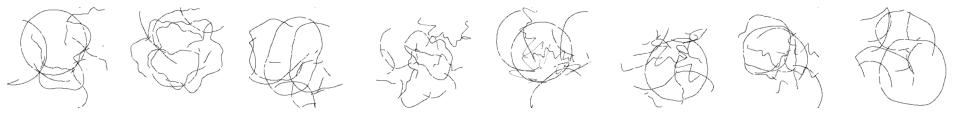

In [23]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_targets[n], cmap='bone')
    plt.axis('off')

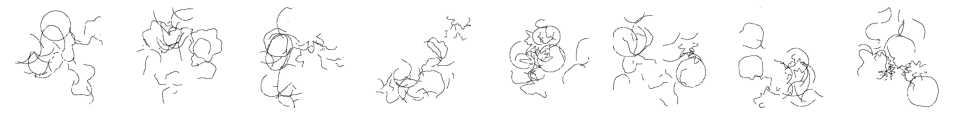

In [30]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_targets[n], cmap='bone')
    plt.axis('off')

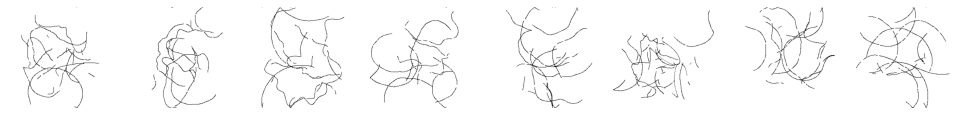

In [26]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_nontargets[n], cmap='bone')
    plt.axis('off')

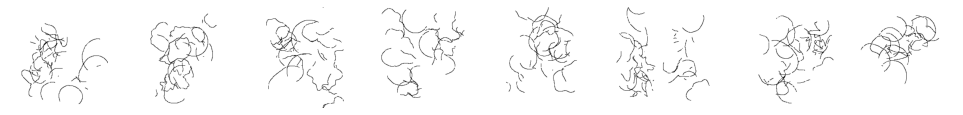

In [32]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_nontargets[n], cmap='bone')
    plt.axis('off')

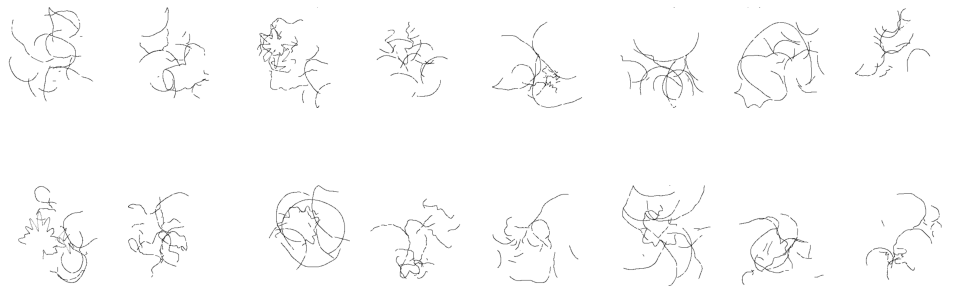

In [52]:
# Make 100 non-targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'small') 
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, 100000+n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)
plt.figure(figsize=(17,6))
for n in np.arange(16):
    plt.subplot(2,8,n+1)
    plt.imshow( 255-imgs_nontargets[n], cmap='bone')
    plt.axis('off')    

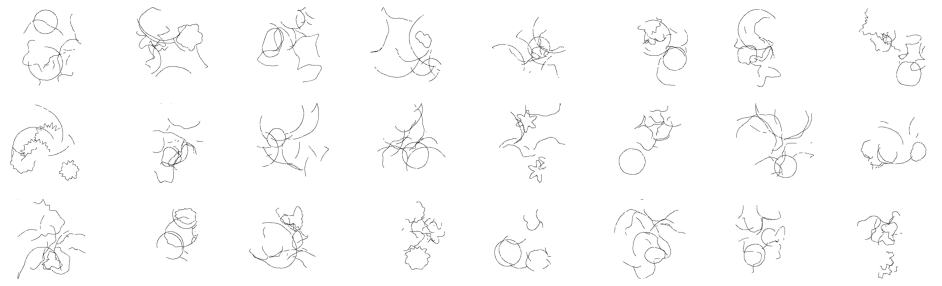

In [56]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'small') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)
plt.figure(figsize=(17,5))
rows=3
cols=8
for n in np.arange(rows*cols):
    plt.subplot(rows,cols,n+1)
    plt.imshow( 255-imgs_targets[n], cmap='bone')
    plt.axis('off')    

In [66]:
def plot_amoebas_grid(imgs,rows,cols=8,figsize=None):
    if figsize==None:
        figsize=(17,2*(rows+1) )
        print( figsize)
        plt.figure(figsize=figsize)
    else:
        plt.figure()
    for n in np.arange(rows*cols):
        plt.subplot(rows,cols,n+1)
        plt.imshow( 255-imgs[n], cmap='bone')
        plt.axis('off')

(17, 10)


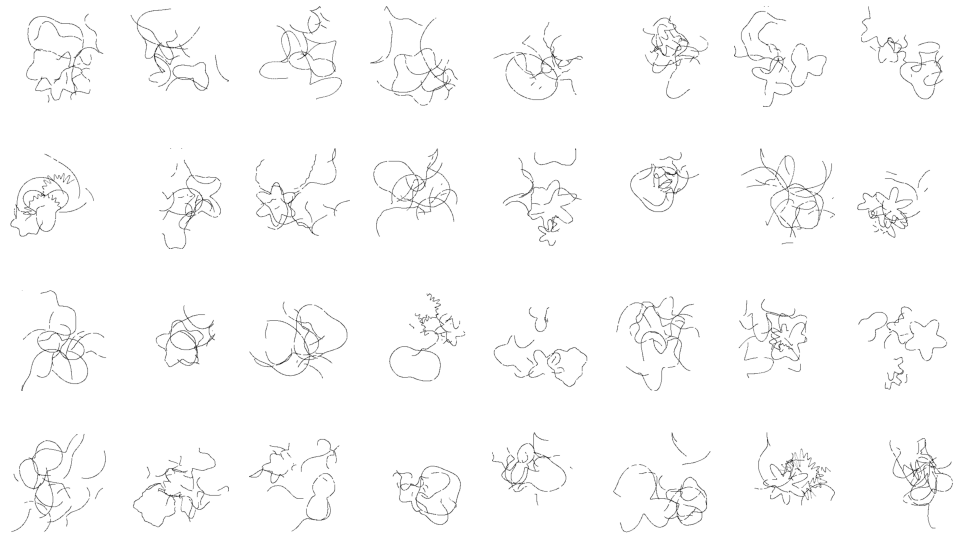

In [175]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'medium') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, 200+n, n)
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)
plot_amoebas_grid(imgs_targets,4,8)

(17, 10)


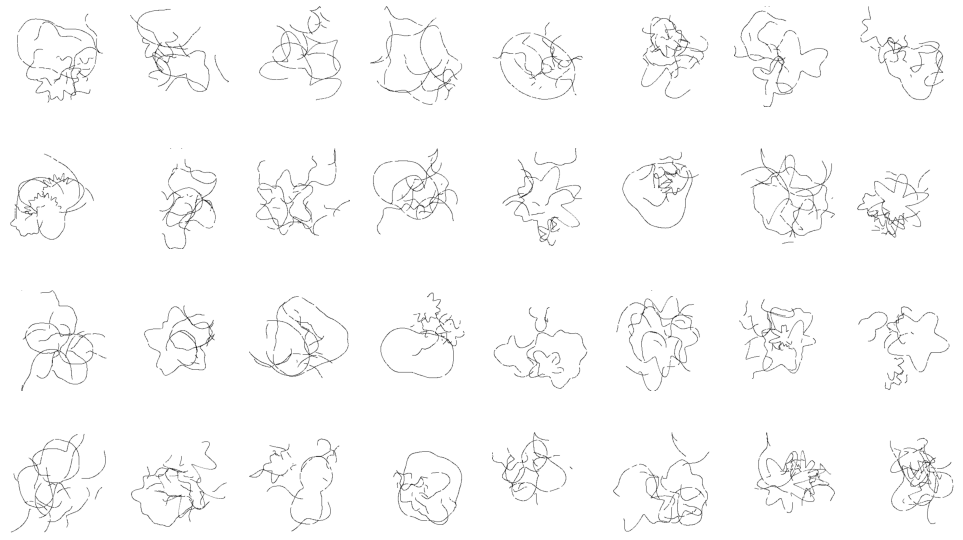

In [178]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'large') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, 200+n, n)
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)
plot_amoebas_grid(imgs_targets,4,8)

(17, 10)


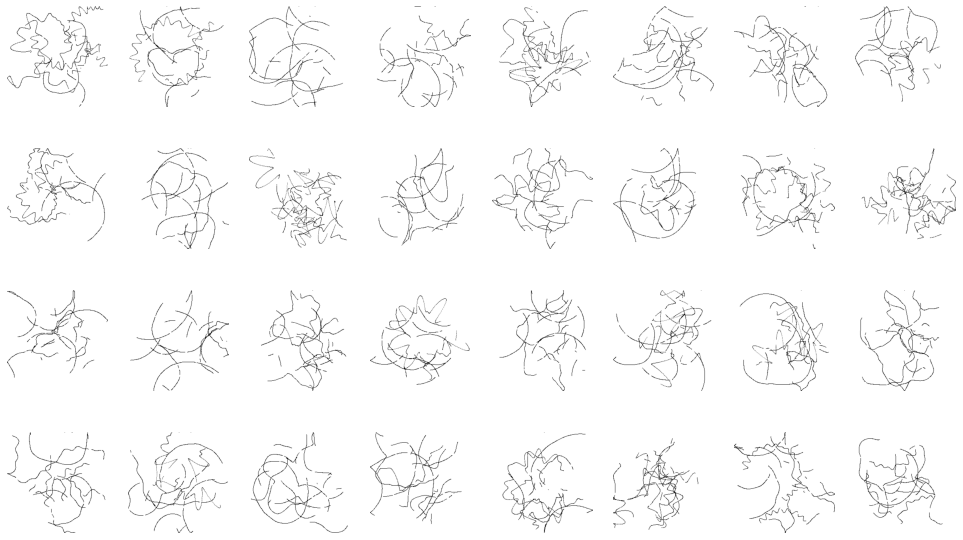

In [140]:
# Make 100 non-targets (fixed size:large)
amoeba_struct = makeAmoebasX.AmoebaStruct(0) 
amoeba_struct.random_distractor_sizes=0
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)

plot_amoebas_grid(imgs_nontargets,4,8)

(17, 10)


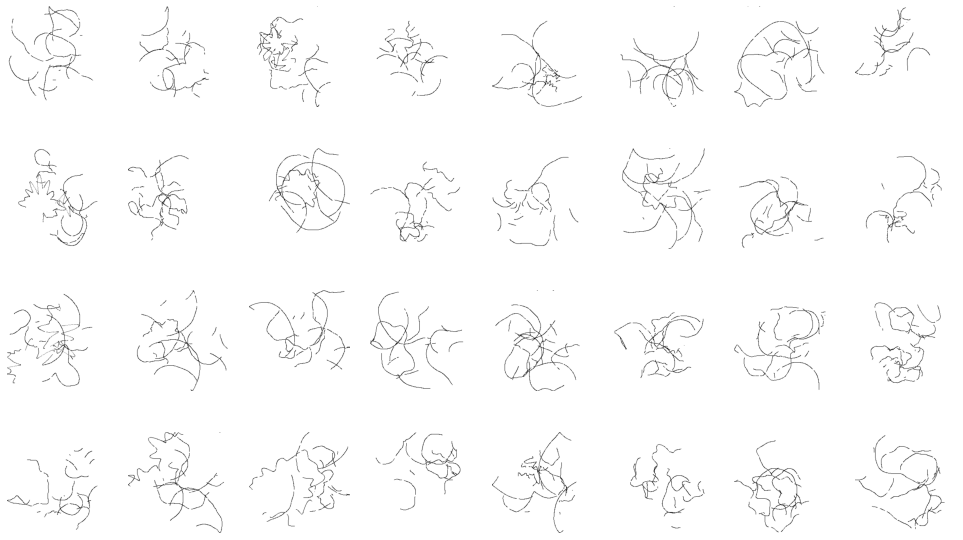

In [80]:
# Make 100 non-targets (random size)
amoeba_struct = makeAmoebasX.AmoebaStruct(0) 
amoeba_struct.random_distractor_sizes=1
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, 100000+n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)


(17, 10)


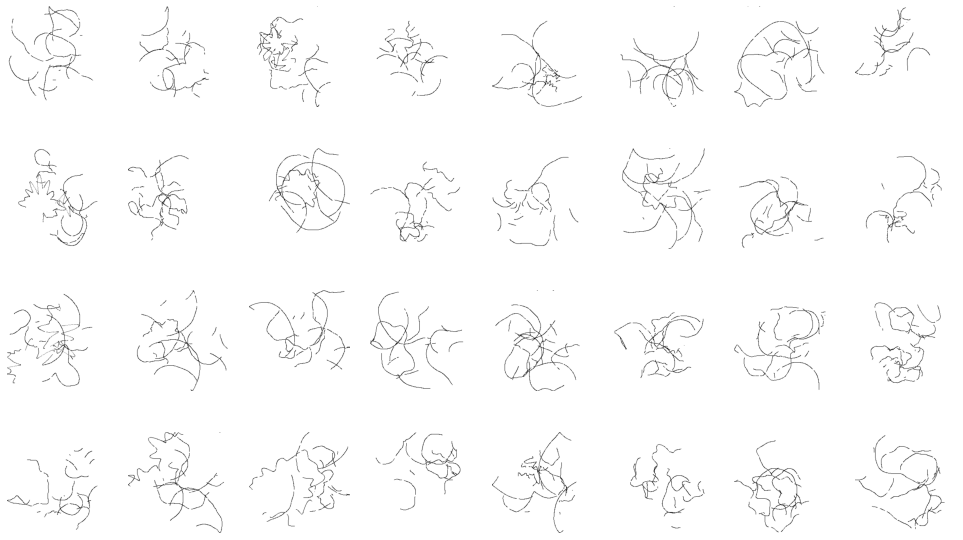

In [84]:
plot_amoebas_grid(imgs_nontargets,4,8)

In [ ]:
# Make 100 non-targets (random size)
amoeba_struct = makeAmoebasX.AmoebaStruct(0) 
amoeba_struct.random_distractor_sizes=1
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)

(17, 10)


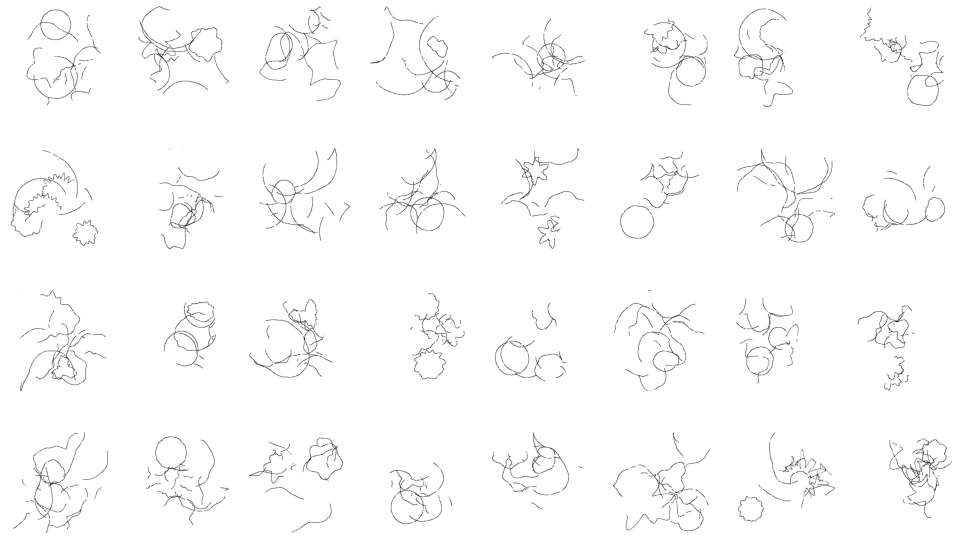

In [90]:
plot_amoebas_grid(imgs_targets,4,8)
plt.savefig('small.png')

(17, 10)


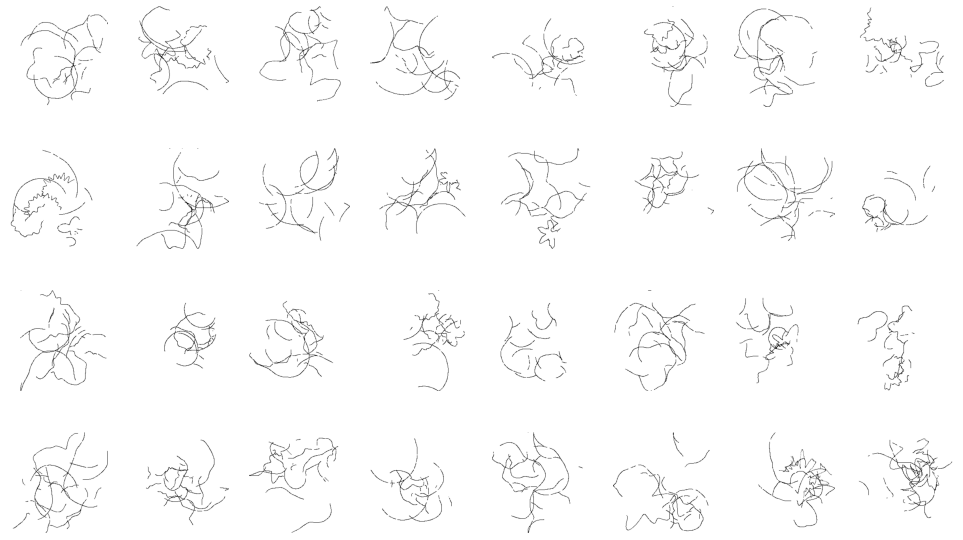

In [92]:
plot_amoebas_grid(imgs_nontargets,4,8)
plt.savefig('notarget.png')

In [93]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'medium') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)

(17, 10)


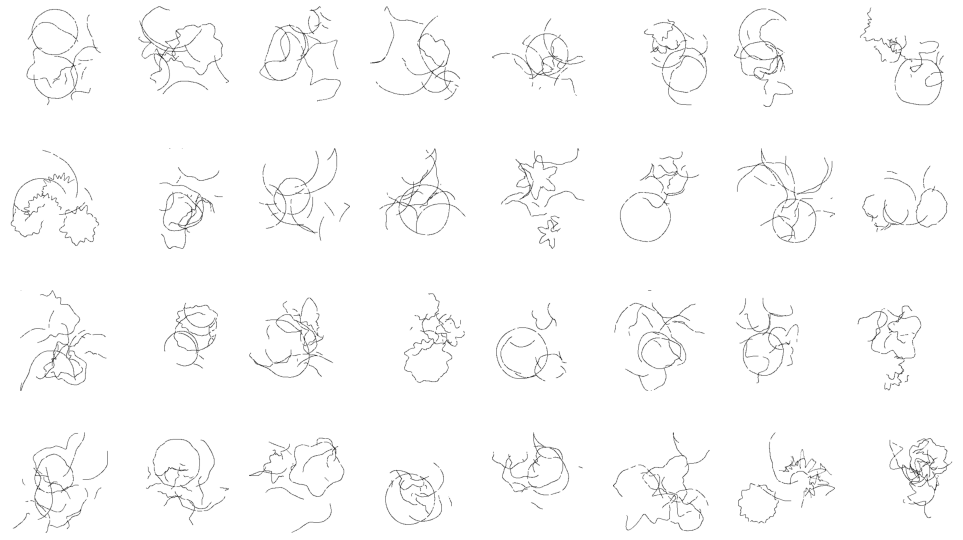

In [95]:
plot_amoebas_grid(imgs_targets,4,8)
plt.savefig('medium.png')

In [103]:
rows=4
cols=8
for size1 in ['small','medium','large']:
    amoeba_struct = makeAmoebasX.AmoebaStruct(1,size1) 
    imgs_targets = np.zeros( (rows*cols,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
    for n in np.arange(rows*cols):
        [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
        imgs_targets[n]=render.render_amoeba(buf, xs,ys)
        
    plot_amoebas_grid(imgs_targets,rows,cols)
    plt.savefig(f'{size1}.png') 

(17, 10)
(17, 10)
(17, 10)


<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

<Figure size 1224x720 with 0 Axes>

(17, 10)


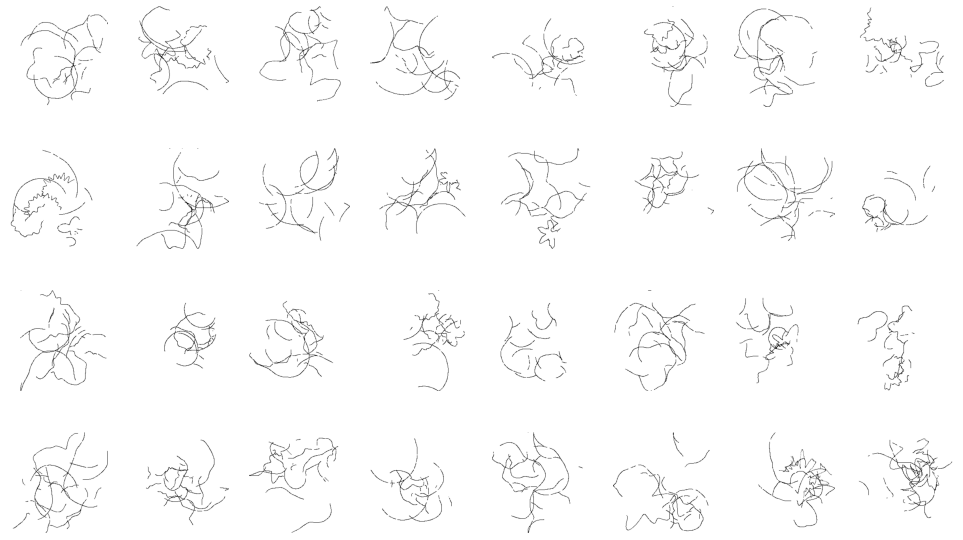

In [104]:
amoeba_struct = makeAmoebasX.AmoebaStruct(0,size1) 
imgs_targets = np.zeros( (rows*cols,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(rows*cols):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)

plot_amoebas_grid(imgs_targets,rows,cols)
plt.savefig('nontarget.png') 